In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

<h1>Overfit, underfit</h1>

In [86]:
x = np.sort(np.random.choice(range(1, 6), size=4, replace=False))
y = np.random.choice(range(1, 8), size=4, replace=False)

In [87]:
deg2 = np.polyfit(x, y, 2)
pol2 = np.poly1d(deg2)

deg3 = np.polyfit(x, y, 3)
pol3 = np.poly1d(deg3)

deg20 = np.polyfit(x, y, 20)
pol20 = np.poly1d(deg20)

C:\Users\tomas\anaconda3\envs\asl\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [113]:
xs = np.linspace(0, 6)
ys2 = pol2(xs)
ys3 = pol3(xs)
ys20 = pol20(xs)

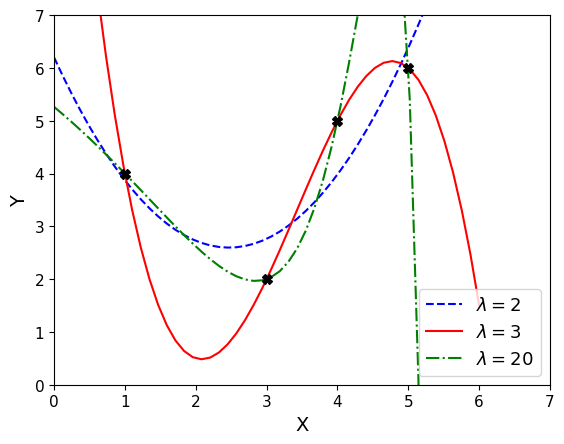

In [114]:
plt.plot(xs, ys2, "--", color="blue")
plt.plot(xs, ys3, "-", color="red")
plt.plot(xs, ys20, "-.", color="green")
plt.plot(x, y, "X", color="k", markersize=7)

plt.xlim([0, x[-1] + 2])
plt.ylim([0, np.max(y) + 1])
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel("X", fontsize=14)
plt.ylabel("Y", fontsize=14)
plt.legend([r"$\lambda = 2$",
            r"$\lambda = 3$",
            r"$\lambda = 20$"], fontsize=13)

plt.savefig("../Images/overfitting.PNG", format="PNG", facecolor="auto", transparent=False)

plt.show()

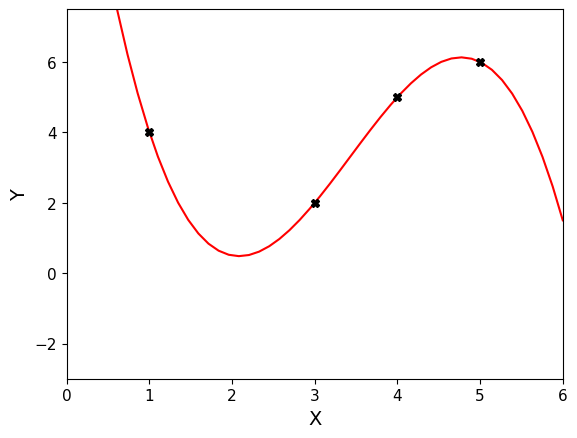

In [90]:
plt.plot(xs, ys3, color="red")
plt.plot(x, y, "X", color="k", markersize=6)

plt.xlim([0, x[-1] + 1])
plt.ylim([-3, np.max(y) + 1.5])
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel("X", fontsize=14)
plt.ylabel("Y", fontsize=14)

plt.savefig("../Images/cubic.PNG", format="PNG", facecolor="auto", transparent=False)

plt.show()

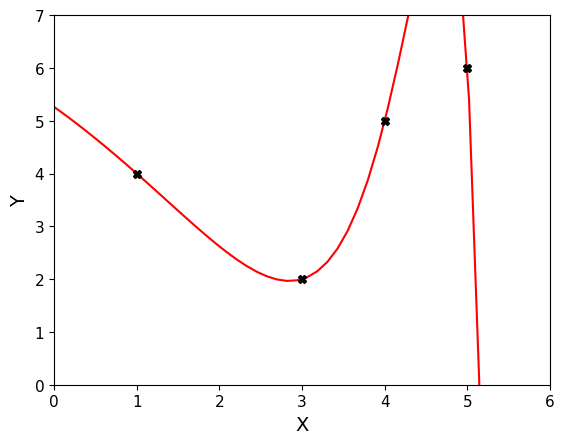

In [91]:
plt.plot(xs, ys20, color="red")
plt.plot(x, y, "X", color="k", markersize=6)

plt.xlim([0, x[-1] + 1])
plt.ylim([0, np.max(y) + 1])
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel("X", fontsize=14)
plt.ylabel("Y", fontsize=14)

plt.savefig("../Images/overfit.PNG", format="PNG", facecolor="auto", transparent=False)

plt.show()

<h1>ReLU Function</h1>

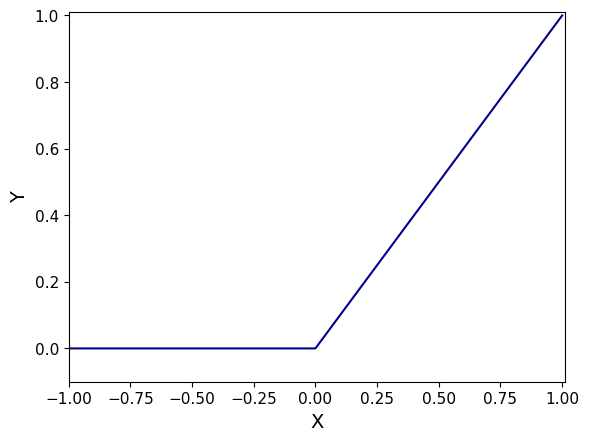

In [17]:
xs = np.linspace(-1, 1, 1000)
plt.plot(xs, [0 if x <= 0 else x for x in xs], color="darkblue")

plt.xlim([-1, 1.01])
plt.ylim([-0.1, 1.01])
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel("X", fontsize=14)
plt.ylabel("Y", fontsize=14)

plt.savefig("../Images/relu.PNG", format="PNG", facecolor="auto", transparent=False)

plt.show()

<h1>Prototype model learning curves</h1>

In [1]:
import pandas as pd

<h2>Optimizer selection</h2>

In [73]:
df_train_acc = pd.read_csv("logs/log_data/prototype_opt/prototype_opt_train_loss.csv").rename(columns={"Value": "train_loss"})
df_val_acc = pd.read_csv("logs/log_data/prototype_opt/prototype_opt_val_loss.csv").rename(columns={"Value": "val_loss"})
df_train_f1 = pd.read_csv("logs/log_data/prototype_opt/prototype_opt_train_f1.csv").rename(columns={"Value": "train_f1"})
df_val_f1 = pd.read_csv("logs/log_data/prototype_opt/prototype_opt_val_f1.csv").rename(columns={"Value": "val_f1"})

In [74]:
df = pd.concat([df_train_acc["train_loss"], df_val_acc["val_loss"],
                df_train_f1["train_f1"], df_val_f1["val_f1"]],
               axis=1).reset_index().rename(columns={"index": "Epoch"})
df["Epoch"] = df["Epoch"] + 1

In [75]:
df.head(2)

,Epoch,train_loss,val_loss,train_f1,val_f1
0,1,3.378258,2.122365,0.121313,0.397263
1,2,2.257903,1.336393,0.369914,0.611478


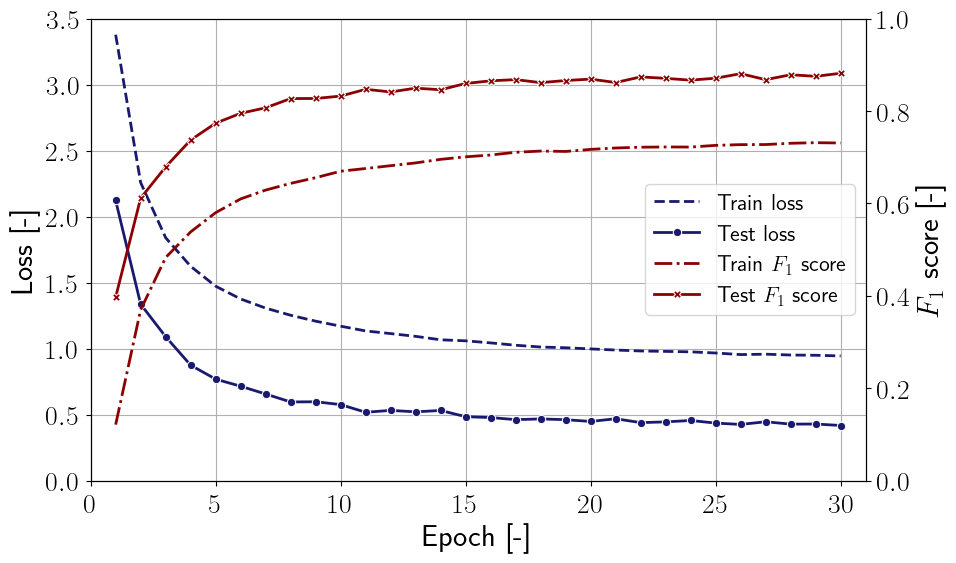

In [99]:
plt.rcParams["text.usetex"] = True

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

train_loss = sb.lineplot(data=df, x="Epoch", y="train_loss",
                         color="midnightblue", lw=2, linestyle="--", ax=ax1, label="Train loss")
val_loss = sb.lineplot(data=df, x="Epoch", y="val_loss",
                       color="midnightblue", lw=2, linestyle="-", marker="o", ax=ax1, label="Test loss")
train_f1 = sb.lineplot(data=df, x="Epoch", y="train_f1",
                       color="darkred", lw=2, linestyle="-.", ax=ax2, label=r"Train $F_1$ score")
val_f1 = sb.lineplot(data=df, x="Epoch", y="val_f1",
                     color="darkred", lw=2, linestyle="-", marker="X", ax=ax2, label=r"Test $F_1$ score")

ax1.grid()

ax1.set_xlabel("Epoch [-]")
ax1.set_xbound(0, 31)
ax1.xaxis.label.set_fontsize(22)
ax1.tick_params(axis="both", labelsize=20, pad=5)

ax1.set_ylabel("Loss [-]")
ax1.set_ybound(0, 3.5)
ax1.yaxis.label.set_fontsize(22)

ax2.set_ylabel(r"$F_1$ score [-]")
ax2.set_ybound(0, 1)
ax2.yaxis.label.set_fontsize(22)
ax2.tick_params(axis="y", labelsize=20, pad=5)

lines = ax1.lines + ax2.lines
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc=7, fontsize=16)
ax2.get_legend().remove()

plt.savefig("../Images/prototype_optimizer.PNG", format="PNG", facecolor="auto", transparent=False, bbox_inches="tight")
plt.show()

plt.rcParams["text.usetex"] = False